In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def padding(X,pad):
    x_pad = np.pad(x,((0,0),(pad,pad),(pad,pad),(0,0)))
    return x_pad

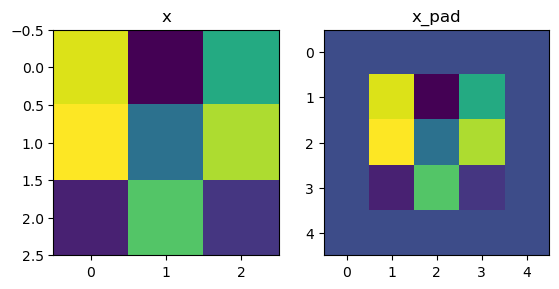

In [8]:
np.random.seed(1)
x = np.random.randn(4,3,3,2)
x_pad = padding(x,1)
ret ,a = plt.subplots(1,2)
a[0].set_title('x')
a[0].imshow(x[0,:,:,0])
a[1].set_title('x_pad')
a[1].imshow(x_pad[0,:,:,0])

In [9]:
def conv_single_step(A_prev,W,b):
    mul = np.multiply(A_prev,W)
    Z = np.sum(mul)
    b = np.squeeze(b)
    Z = Z + b
    
    return Z

In [11]:
def conv_forward(A_previous,W,b,hyperparameters):
    (m, nh_prev,nw_prev,nc_prev) = A_previous.shape
    (f,f,nc_prev,nc) = W.shape
    pad = hyperparameters['pad']
    stride = hyperparameters['stride']
    nh = ((nh_prev + 2*pad - f) / stride) + 1
    nw = ((nw_prev + 2*pad - f) / stride) + 1
    Z = np.zeros((m,nh,nw,nc))
    A_previous_pad = padding(A_previous,pad)
    for i in range(m):
        a_previous_pad = A_previous_pad[i]
        for h in range(nh):
            vert_start = stride * h
            vert_end = vert_start + f
            for w in range(nw):
                hori_start = stride * w
                hori_end = hori_start + f
                for c in range(nc):
                    a_prev_slice = a_previous_pad[vert_start:vert_end,hori_start:hori_end,:]
                    w = W[:,:,:,c]
                    b = b[:,:,:,c]
                    Z[i,h,w,c] = conv_single_step[a_prev_slice,w,b]
                    
    cache = (A_previous,w,b,hyperparameters)
    return cache,Z

In [12]:
def pool_forward(A_previous,hyperparameters,pool='max'):
    f = hyperparameters['f']
    stride = hyperparametrs['stride']
    (m,nh_prev,nw_prev,nc_prev) = A_previous.shape
    nh = ((nh_prev-f)/stride )+ 1
    nw = ((nw_prev-f)/stride )+ 1
    Z = np.zeros((m,nh,nw,nc_prev))
    for i in range(m):
        a_prev = A_previous[i]
        for h in range(nh):
            vert_start = stride * h
            vert_end = vert_start + f
            for w in range(nw):
                hori_start = stride * w
                hori_end = hori_start + f
                for c in range(nc):
                    a_prev_slice = a_prev[vert_start:vert_end,hori_start:hori_end,c]
                    if pool == 'max':
                        Z[i,h,w,c] = np.max(a_prev_slice)
                    elif pool == 'avg':
                        Z[i,h,w,c] = np.mean(a_prev_slice)
                        
    cache = (A_prev,hyperparameters)
    return Z , cache